In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
from trackml.dataset import load_event, load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

## Looking at one event 


In [4]:
event_id = 'event000001000'

In [7]:
%pwd

'/home/dl-one/trackml'

In [5]:
hits, cells, particles, truth = load_event('data/train_sample/'+event_id)

In [1]:
type(hits)

NameError: name 'hits' is not defined

In [6]:
hits.tail()

,hit_id,x,y,z,volume_id,layer_id,module_id
120934,120935,-763.862976,51.569401,2944.5,18,12,97
120935,120936,-808.705017,3.459260,2944.5,18,12,97
120936,120937,-982.935974,41.460899,2952.5,18,12,98
120937,120938,-942.698975,18.489100,2952.5,18,12,98
120938,120939,-922.890015,2.092850,2952.5,18,12,98


In [17]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id
count,120939.00000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000
mean,60470.00000,-1.769455,4.751039,-2.315056,10.921564,5.918389,371.969117
std,34912.22644,305.715118,305.173096,1061.912476,3.365705,3.407428,529.032206
min,1.00000,-1024.839966,-1025.109985,-2955.500000,7.000000,2.000000,1.000000
25%,30235.50000,-100.146000,-95.896503,-655.799988,8.000000,4.000000,60.000000
50%,60470.00000,-1.651340,1.005920,-1.800000,9.000000,6.000000,119.000000
75%,90704.50000,97.267651,103.224003,655.799988,13.000000,8.000000,490.000000
max,120939.00000,1025.329956,1024.849976,2955.500000,18.000000,14.000000,3192.000000


In [18]:
layers = hits.layer_id.unique()

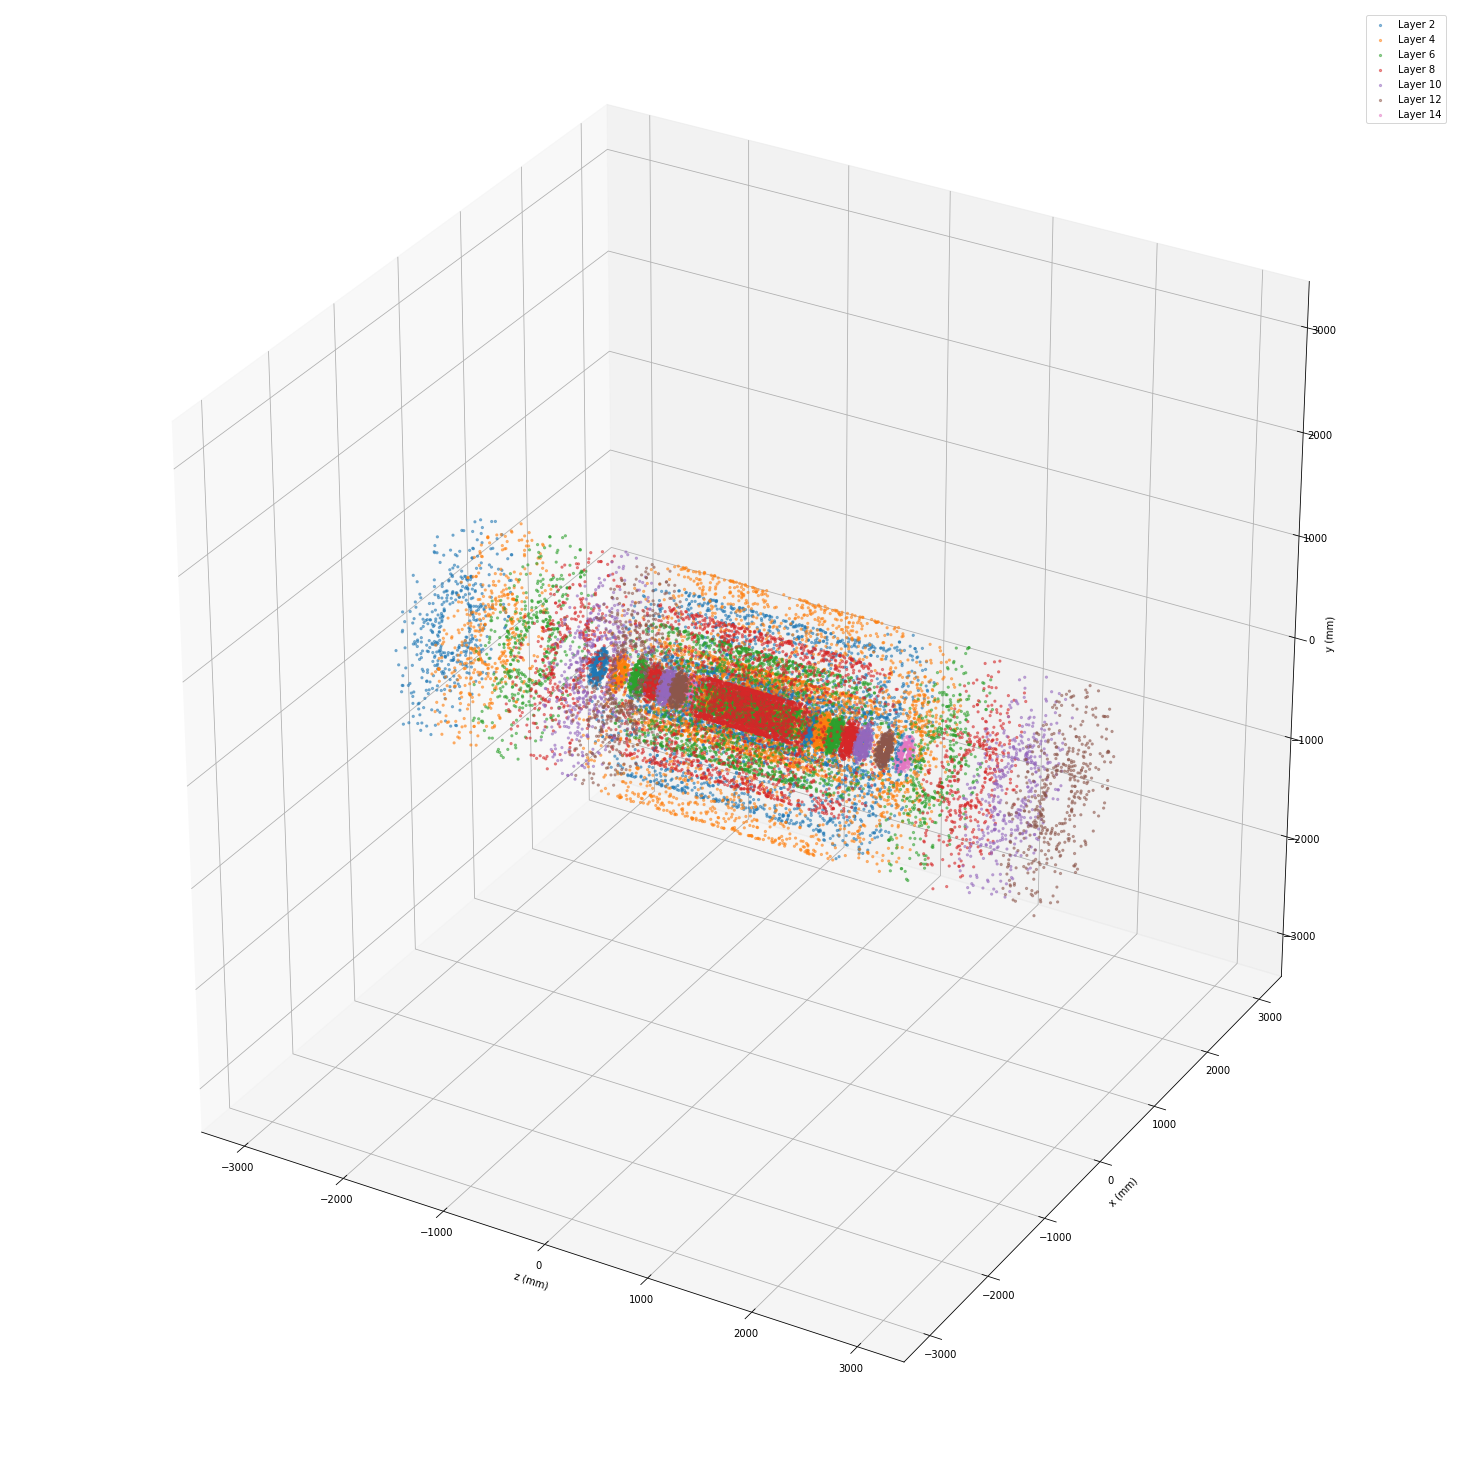

In [26]:

ax = Axes3D( plt.figure(figsize=(20,20)))
sample = hits.sample(30000) ## pandas function, randomly samples given amount
for layer in layers:
    l = sample[sample.layer_id == layer]
    ax.scatter(l.z, l.x, l.y, s=5, label='Layer '+str(layer), alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
ax.legend()
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()



volumes -> layers -> modules -> cells 

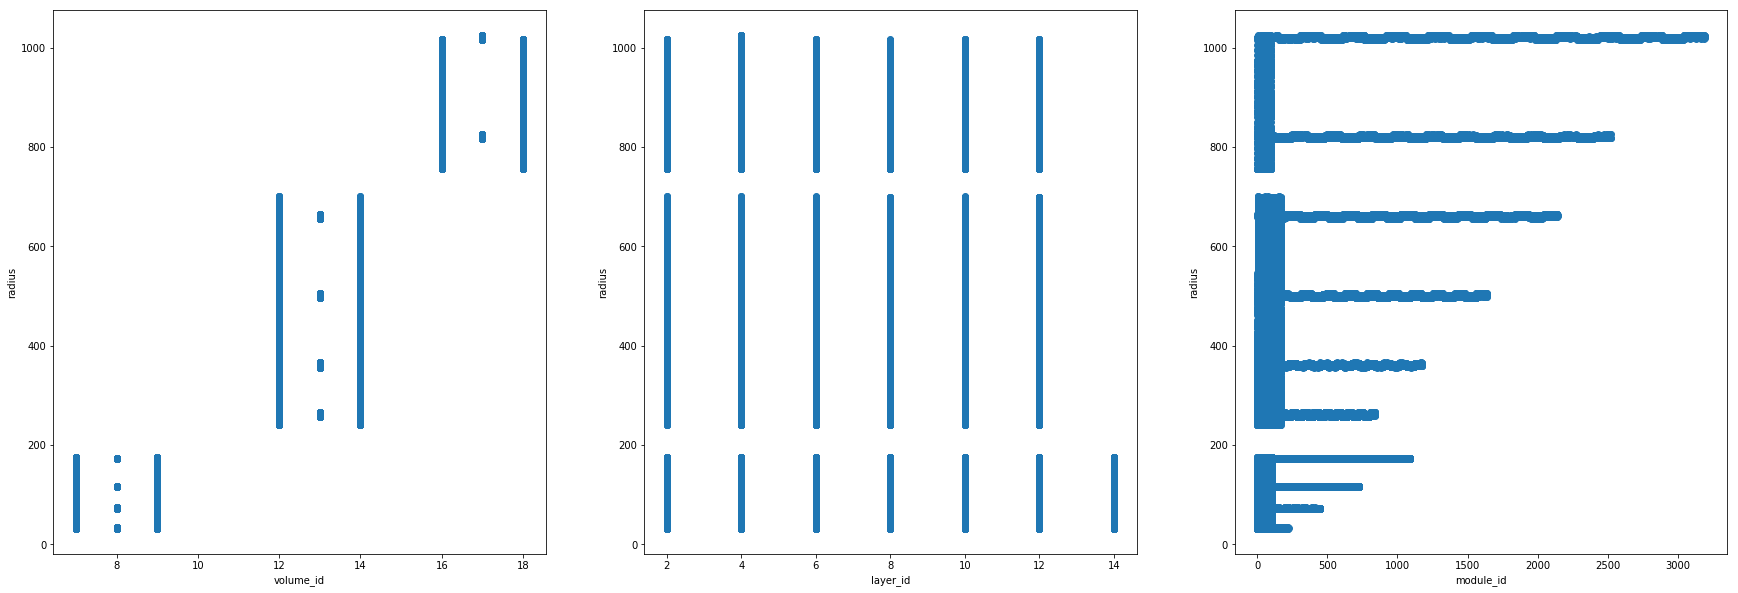

In [28]:
radius2 = np.sqrt(hits.x**2 + hits.y**2)

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.scatter(hits.volume_id, radius2)
plt.xlabel('volume_id')
plt.ylabel('radius')
plt.subplot(1,3,2)
plt.scatter(hits.layer_id, radius2)
plt.xlabel('layer_id')
plt.ylabel('radius')
plt.subplot(1,3,3)
plt.scatter(hits.module_id, radius2)
plt.xlabel('module_id')
plt.ylabel('radius')
plt.show()